## Distribuição Binomial 
Na distribuição binomial temos sempre duas possibilidades de resultado (sucesso ou fracasso, cara ou coroa, etc.). Podemos então utilizar a distribuição binomial para simular o lançamento de uma moeda.

In [45]:
import numpy as np
np.random.binomial(1, 0.5)

0

Como simular o lançamento de duas moedas?

In [46]:
np.random.binomial(2, 0.5)

2

E se eu quiser simular 1.000 lançamentos de duas moedas?

In [47]:
np.random.binomial(2, 0.5, 1000)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0,
       2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2,

Vamos agora guardar o resultado obtido numa variável e analisar esse resultado. Vimos, na parte teórica que se lançarmos duas moedas temos as seguintes probabilidades: \
0 caras -> P(0) = 0,25 \
1 cara  -> P(1) = 0,5 \
2 caras -> P(2) = 0,25 \
Vamos plotar o resultado de 1.000 lançamentos e analisar esse resultado.

<Axes: ylabel='count'>

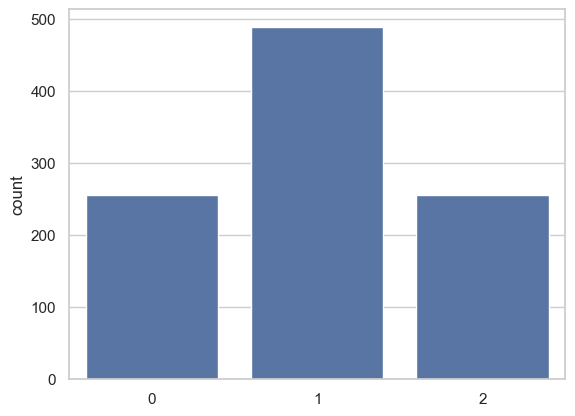

In [48]:
mil = np.random.binomial(2, 0.5, 1000)
import matplotlib as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.countplot(x=mil)

Vamos agora simular mil jogos de 10 moedas.

<Axes: ylabel='count'>

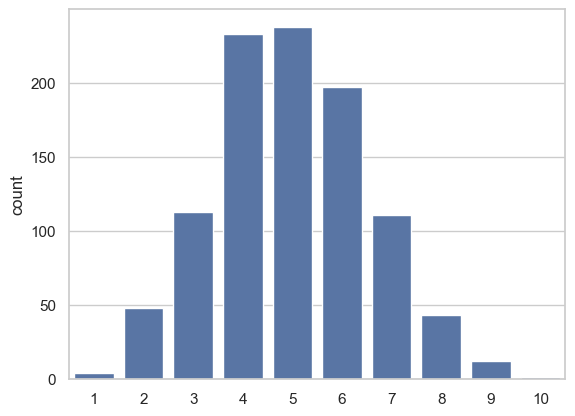

In [49]:
mil_jogos = np.random.binomial(10, 0.5, 1000)
import matplotlib as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.countplot(x=mil_jogos)

Considere agora o seguinte problema: \
Uma manufatura tem uma taxa de defeitos de 12% na sua produção. Um comprador decide testar uma amostra de 20 peças aleatórias e só comprará da manufatura se encontrar duas ou menos peças defeituosas na amostra. Qual é a probabilidade de que a compra ocorra?

Na parte teórica, vimos que existem fórmulas matemáticas para realizar este cálculo. A linguagem Python provê o pacote SciPy para realizar esses cálculos. Veremos a seguir como usar o Scipy para resolver o problema acima.

In [50]:
from scipy.stats import binom

Para obter a probabilidade de que a compra ocorra, vamos utilizar a função cdf -- cumulative distribution function. Estamos usando essa função porque queremos calcular a probabilidade de termos até 2 peças defeituosas, ou seja, P(0) + P(1) + P(2) => portanto estamos acumulando (somando) as probabilidades. \
A função cdf tem 3 parâmetros: \
k - número máximo de peças defeituosas (cumulativo) \
n - número de peças da amostra \
p - probabilidade de peças defeituosas 

In [51]:
round(binom.cdf(2, 20, 0.12), 4) #round é o numero de casas decimais

0.5631

E se quisermos descobrir a probabilidade de obtermos *exatamente* 2 peças defeituosas na amostra? \
Para tanto basta usar a função pmf -- probability mass function -- a qual tem os mesmos parâmetros que a função cdf.

In [52]:
binom.pmf(2, 20, 0.12)

0.27403383702748796

Para calcularmos o número médio de peças defeituosas por amostra, basta usar a função mean, com os parâmetros n e p.

In [53]:
binom.mean(20, 0.12)

2.4

De forma similar, podemos obter o desvio padrão e a variância com as funções std e var.

In [54]:
p0 = binom.pmf(0, 20, 0.12)
print(p0)
p1 = binom.pmf(1, 20, 0.12)
print(p1)
p2 = binom.pmf(2, 20, 0.12)
print(p2)
soma = p0 + p1 + p2
print(soma)


0.07756279363818955
0.211534891740517
0.27403383702748796
0.5631315224061946


In [55]:
binom.std(20, 0.12)

1.453272169966796

In [56]:
binom.var(20, 0.12)

2.112

Suponha agora que queremos obter a probabilidade de obtermos 2 ou mais peças defeituosas na amostra. \
Existem duas possibilidades para isso: 
1) fazer 1 menos a probabilidade que calculamos 
2) utilizar a função sf -- survival function

In [57]:
soma2 = 1 - soma
soma2

0.4368684775938054

In [58]:
binom.sf(2, 20, 0.12)

0.4368684775938054

Suponha agora que eu queira plotar um gráfico que mostre a probabilidade de ter 1, 2, 3, ... 20 peças defeituosas. Isto recebe o nome de distribuição de probabilidade. Vejamos como fazer isso.

In [59]:
eixo_x = np.arange(0, 21)
print(eixo_x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [60]:
eixo_y = binom.pmf(eixo_x, 20, 0.12)
for i in range(20):
    print(f'{i} - {eixo_y[i]:.2f}')

0 - 0.08
1 - 0.21
2 - 0.27
3 - 0.22
4 - 0.13
5 - 0.06
6 - 0.02
7 - 0.01
8 - 0.00
9 - 0.00
10 - 0.00
11 - 0.00
12 - 0.00
13 - 0.00
14 - 0.00
15 - 0.00
16 - 0.00
17 - 0.00
18 - 0.00
19 - 0.00


<Axes: >

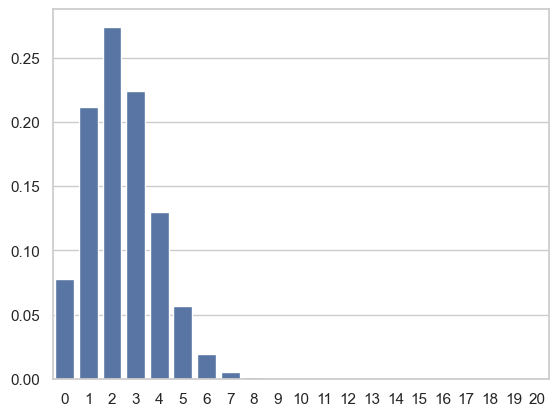

In [64]:
sns.set_theme(style='whitegrid')
sns.barplot(x=eixo_x,y=eixo_y)

Podemos também fazer um gráfico mostrando a probabilidade cumulativa.

0 - 0.08
1 - 0.29
2 - 0.56
3 - 0.79
4 - 0.92
5 - 0.97
6 - 0.99
7 - 1.00
8 - 1.00
9 - 1.00
10 - 1.00
11 - 1.00
12 - 1.00
13 - 1.00
14 - 1.00
15 - 1.00
16 - 1.00
17 - 1.00
18 - 1.00
19 - 1.00


<Axes: >

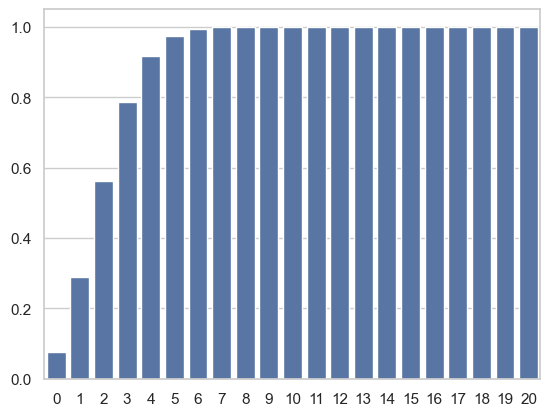

In [72]:
eixo_y = binom.cdf(eixo_x, 20, 0.12)
for i in range(20):
    print(f'{i} - {eixo_y[i]:.2f}')
sns.barplot(x=eixo_x,y=eixo_y)

Vamos agora realizar um experimento para confirmar as probabilidades calculadas. Inicialmente vamos analisar o resultado de 10 amostras e checar o número de peças defeituosas em cada amostra.

In [73]:
vet = np.random.binomial(20, 0.12, 10)
vet

array([0, 3, 2, 1, 3, 1, 2, 3, 2, 4])

Agora vamos gerar um vetor com o resultado de 1.000 amostras e utilizar esse vetor para plotar um gráfico.

<Axes: ylabel='count'>

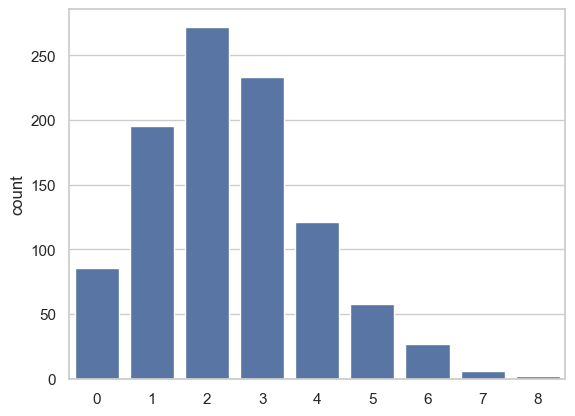

In [76]:
vetor = np.random.binomial(20, 0.12, 1000)
sns.countplot(x=vetor)

Exercício 1 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 caras?

In [69]:
prob = binom.pmf(7, 10, 0.5)
print(prob)

0.11718749999999999


Exercício 2 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 ou mais caras?

In [70]:
prob1 = 1 - prob
print(prob1)

0.8828125


Exercício 3 \
4 peças foram selecionadas de um lote cuja probabilidade de defeito é de 10%. Qual é a probabilidade de termos 0 peças defeituosas na seleção?

In [79]:
defeito = binom.cdf(0, 4, 0.10)
defeito

0.6560999999999999

Exercício 4 \
Plote um gráfico que exiba a distribuição de probabilidade do problema descrito no exercício 3.

<Axes: >

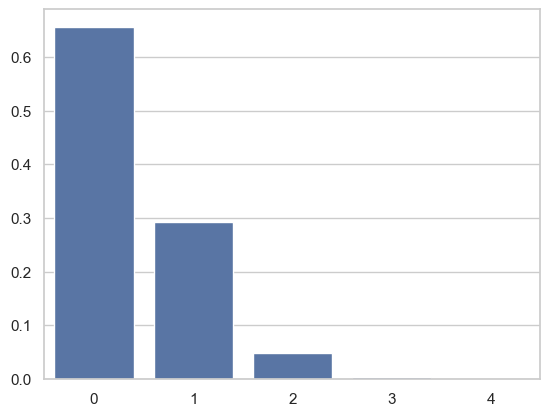

In [90]:
eixo_x = np.arange(0, 5)
eixo_y = binom.pmf(eixo_x, 4, 0.10)
sns.barplot(x=eixo_x, y=eixo_y)

Exercício 5 \
Um teste de múltipla escolha apresenta 4 opções por questão, e 14 questões. Se a aprovação depende de 9 ou mais respostas corretas: \
a) qual a probabilidade de um estudante que responde “no chute” ser aprovado? \
b) se 500 estudantes fazem o teste, qual o número esperado de estudantes aprovados, tendo “chutado” as respostas?

In [91]:
binom.pmf(9, 14, 0.24)

0.0013410136853605694

In [92]:
binom.pmf(9, 14, 0.24, 500)

0.0

Exercício 6 \
Um apostador que nada entende de futebol marcou um cartão de loteria esportiva, que tem 16 jogos, realizando apenas apostas simples (ou seja, marcando somente uma das três opções: time A vence, times A e B empatam, time B ganha). Plote um gráfico de barras que mostre a probabilidade de 0, 1, 2, ... 16 acertos.

<Axes: >

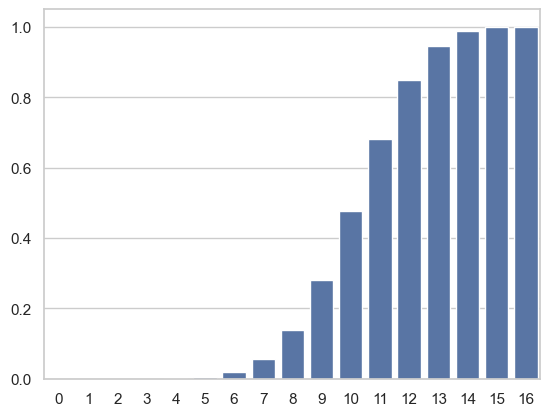

In [96]:
eixo_x = np.arange(0, 17)
eixo_y = binom.cdf(eixo_x, 16, 0.66)
sns.barplot(x=eixo_x, y=eixo_y)
